In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

# format all floating-point numbers to 2 decimal places when displaying them in tables
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
csv_file = 'data/US_Accidents_FL.csv'

traffic_accidents_raw = pd.read_csv(csv_file) # leemos el dataset


### 🔍 Análisis Exploratorio (EDA)

In [4]:
# Prints the columns name as a list
traffic_accidents_raw.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [5]:
# Checking the Length of Number of Columns
len(traffic_accidents_raw.columns)

46

In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric_df = traffic_accidents_raw.select_dtypes(include=numerics)
len(numeric_df.columns)

13

In [7]:
traffic_accidents_raw.head(3)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-116062,Source2,3,2016-11-30 15:36:03,2016-11-30 17:09:22,27.98,-82.33,NaN,NaN,0.01,Queueing traffic and two left lane blocked due to accident on I-75 Southbound after Exits 260 260A 260B FL-574 Dr Martin Luther King Jr Blvd.,E Dr Martin Luther King Jr Blvd,Tampa,Hillsborough,FL,33610,US,US/Eastern,KVDF,2016-11-30 15:35:00,80.60,NaN,70.00,29.94,10.00,SSW,5.80,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
1,A-116063,Source2,3,2016-11-30 16:25:35,2016-11-30 17:12:25,27.98,-82.33,NaN,NaN,0.01,Queueing traffic and 2 left lane closed due to accident on I-75 Southbound at Exits 260 260A 260B FL-574 Dr Martin Luther King Jr Blvd.,E Dr Martin Luther King Jr Blvd,Tampa,Hillsborough,FL,33610,US,US/Eastern,KVDF,2016-11-30 16:35:00,80.60,NaN,65.00,29.94,10.00,WSW,6.90,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
2,A-116064,Source2,2,2016-11-30 16:40:31,2016-11-30 17:10:19,25.63,-80.37,NaN,NaN,0.01,Accident on FL-992 152nd St at Lincoln Blvd.,SW 152nd St,Miami,Miami-Dade,FL,33157-1147,US,US/Eastern,KTMB,2016-11-30 16:53:00,80.10,NaN,71.00,29.96,10.00,SE,9.20,NaN,Mostly Cloudy,False,False,True,False,False,False,False,False,False,True,False,True,False,Day,Day,Day,Day


In [8]:
traffic_accidents_raw.shape

(880192, 46)

In [9]:
traffic_accidents_raw.dtypes

ID                        object
Source                    object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Street                    object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity                     bool
Bump      

In [10]:
# Identificamos si hay valores nulos en el dataset
traffic_accidents_raw.isnull().sum()
missing_values = traffic_accidents_raw.isnull().sum()

missing_values

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                  282640
End_Lng                  282640
Distance(mi)                  0
Description                   0
Street                     1251
City                         33
County                        0
State                         0
Zipcode                     765
Country                       0
Timezone                    766
Airport_Code               1007
Weather_Timestamp          5458
Temperature(F)            13828
Wind_Chill(F)            189358
Humidity(%)               15483
Pressure(in)               7546
Visibility(mi)            11407
Wind_Direction            12418
Wind_Speed(mph)           33559
Precipitation(in)        167669
Weather_Condition          9900
Amenity                       0
Bump                          0
Crossing

In [11]:
number_columns = traffic_accidents_raw.select_dtypes(include = np.number).columns.to_list()
number_columns

['Severity',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Speed(mph)',
 'Precipitation(in)']

In [12]:
categorical_columns = traffic_accidents_raw.select_dtypes(include = "object").columns.to_list()
categorical_columns

['ID',
 'Source',
 'Start_Time',
 'End_Time',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [13]:
# Tratamiento de valores nulos: rellenar con valores apropiados

# Para columnas numéricas, rellenamos con la mediana
for col in number_columns:
    median_value = traffic_accidents_raw[col].median()
    traffic_accidents_raw[col] = traffic_accidents_raw[col].fillna(median_value)

# Para columnas categóricas, rellenamos con la moda
for col in categorical_columns:
    mode_value = traffic_accidents_raw[col].mode()[0]
    traffic_accidents_raw[col] = traffic_accidents_raw[col].fillna(mode_value)

In [14]:
print("\nInformación general del dataset:")
traffic_accidents_raw.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880192 entries, 0 to 880191
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     880192 non-null  object 
 1   Source                 880192 non-null  object 
 2   Severity               880192 non-null  int64  
 3   Start_Time             880192 non-null  object 
 4   End_Time               880192 non-null  object 
 5   Start_Lat              880192 non-null  float64
 6   Start_Lng              880192 non-null  float64
 7   End_Lat                880192 non-null  float64
 8   End_Lng                880192 non-null  float64
 9   Distance(mi)           880192 non-null  float64
 10  Description            880192 non-null  object 
 11  Street                 880192 non-null  object 
 12  City                   880192 non-null  object 
 13  County                 880192 non-null  object 
 14  St

In [15]:
traffic_accidents_raw.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00
mean,2.14,27.53,-81.48,27.41,-81.38,0.53,75.40,75.63,71.37,30.02,9.52,8.46,0.01
std,0.41,1.56,1.44,1.29,1.20,1.67,10.38,9.62,17.12,0.16,1.68,5.04,0.06
min,1.00,24.55,-87.56,24.57,-87.62,0.00,-58.00,-80.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,25.93,-82.25,26.07,-81.50,0.00,70.00,73.00,59.00,29.94,10.00,5.00,0.00
50%,2.00,27.76,-81.40,27.41,-81.33,0.10,77.00,77.00,72.00,30.02,10.00,8.00,0.00
75%,2.00,28.53,-80.32,28.19,-80.38,0.38,82.00,81.00,86.00,30.09,10.00,12.00,0.00
max,4.00,31.00,-80.04,31.01,-80.04,148.36,174.00,174.00,100.00,58.63,72.00,984.00,9.98


In [16]:
print("\nValores Nulos por columna:")
traffic_accidents_raw.isnull().sum()


Valores Nulos por columna:


ID                       0
Source                   0
Severity                 0
Start_Time               0
End_Time                 0
Start_Lat                0
Start_Lng                0
End_Lat                  0
End_Lng                  0
Distance(mi)             0
Description              0
Street                   0
City                     0
County                   0
State                    0
Zipcode                  0
Country                  0
Timezone                 0
Airport_Code             0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Amenity                  0
Bump                     0
Crossing                 0
Give_Way                 0
Junction                 0
No_Exit                  0
Railway                  0
Roundabout               0
S

In [17]:
# Crear un DataFrame con el número de valores únicos por columna
unique_values_df = pd.DataFrame({
    'Columna': traffic_accidents_raw.columns,
    'Valores Únicos': [traffic_accidents_raw[col].nunique() for col in traffic_accidents_raw.columns]
})

print("\nValores únicos por columna:\n")
display(unique_values_df)


Valores únicos por columna:



,Columna,Valores Únicos
0,ID,880192
1,Source,3
2,Severity,4
3,Start_Time,662141
4,End_Time,759762
5,Start_Lat,264142
6,Start_Lng,249042
7,End_Lat,171907
8,End_Lng,169816
9,Distance(mi),10630


In [18]:
# Identificar y mostrar las filas duplicadas agrupadas para visualización
traffic_accidents_raw.duplicated().sum() 

# no se encontraron filas duplicadas

0

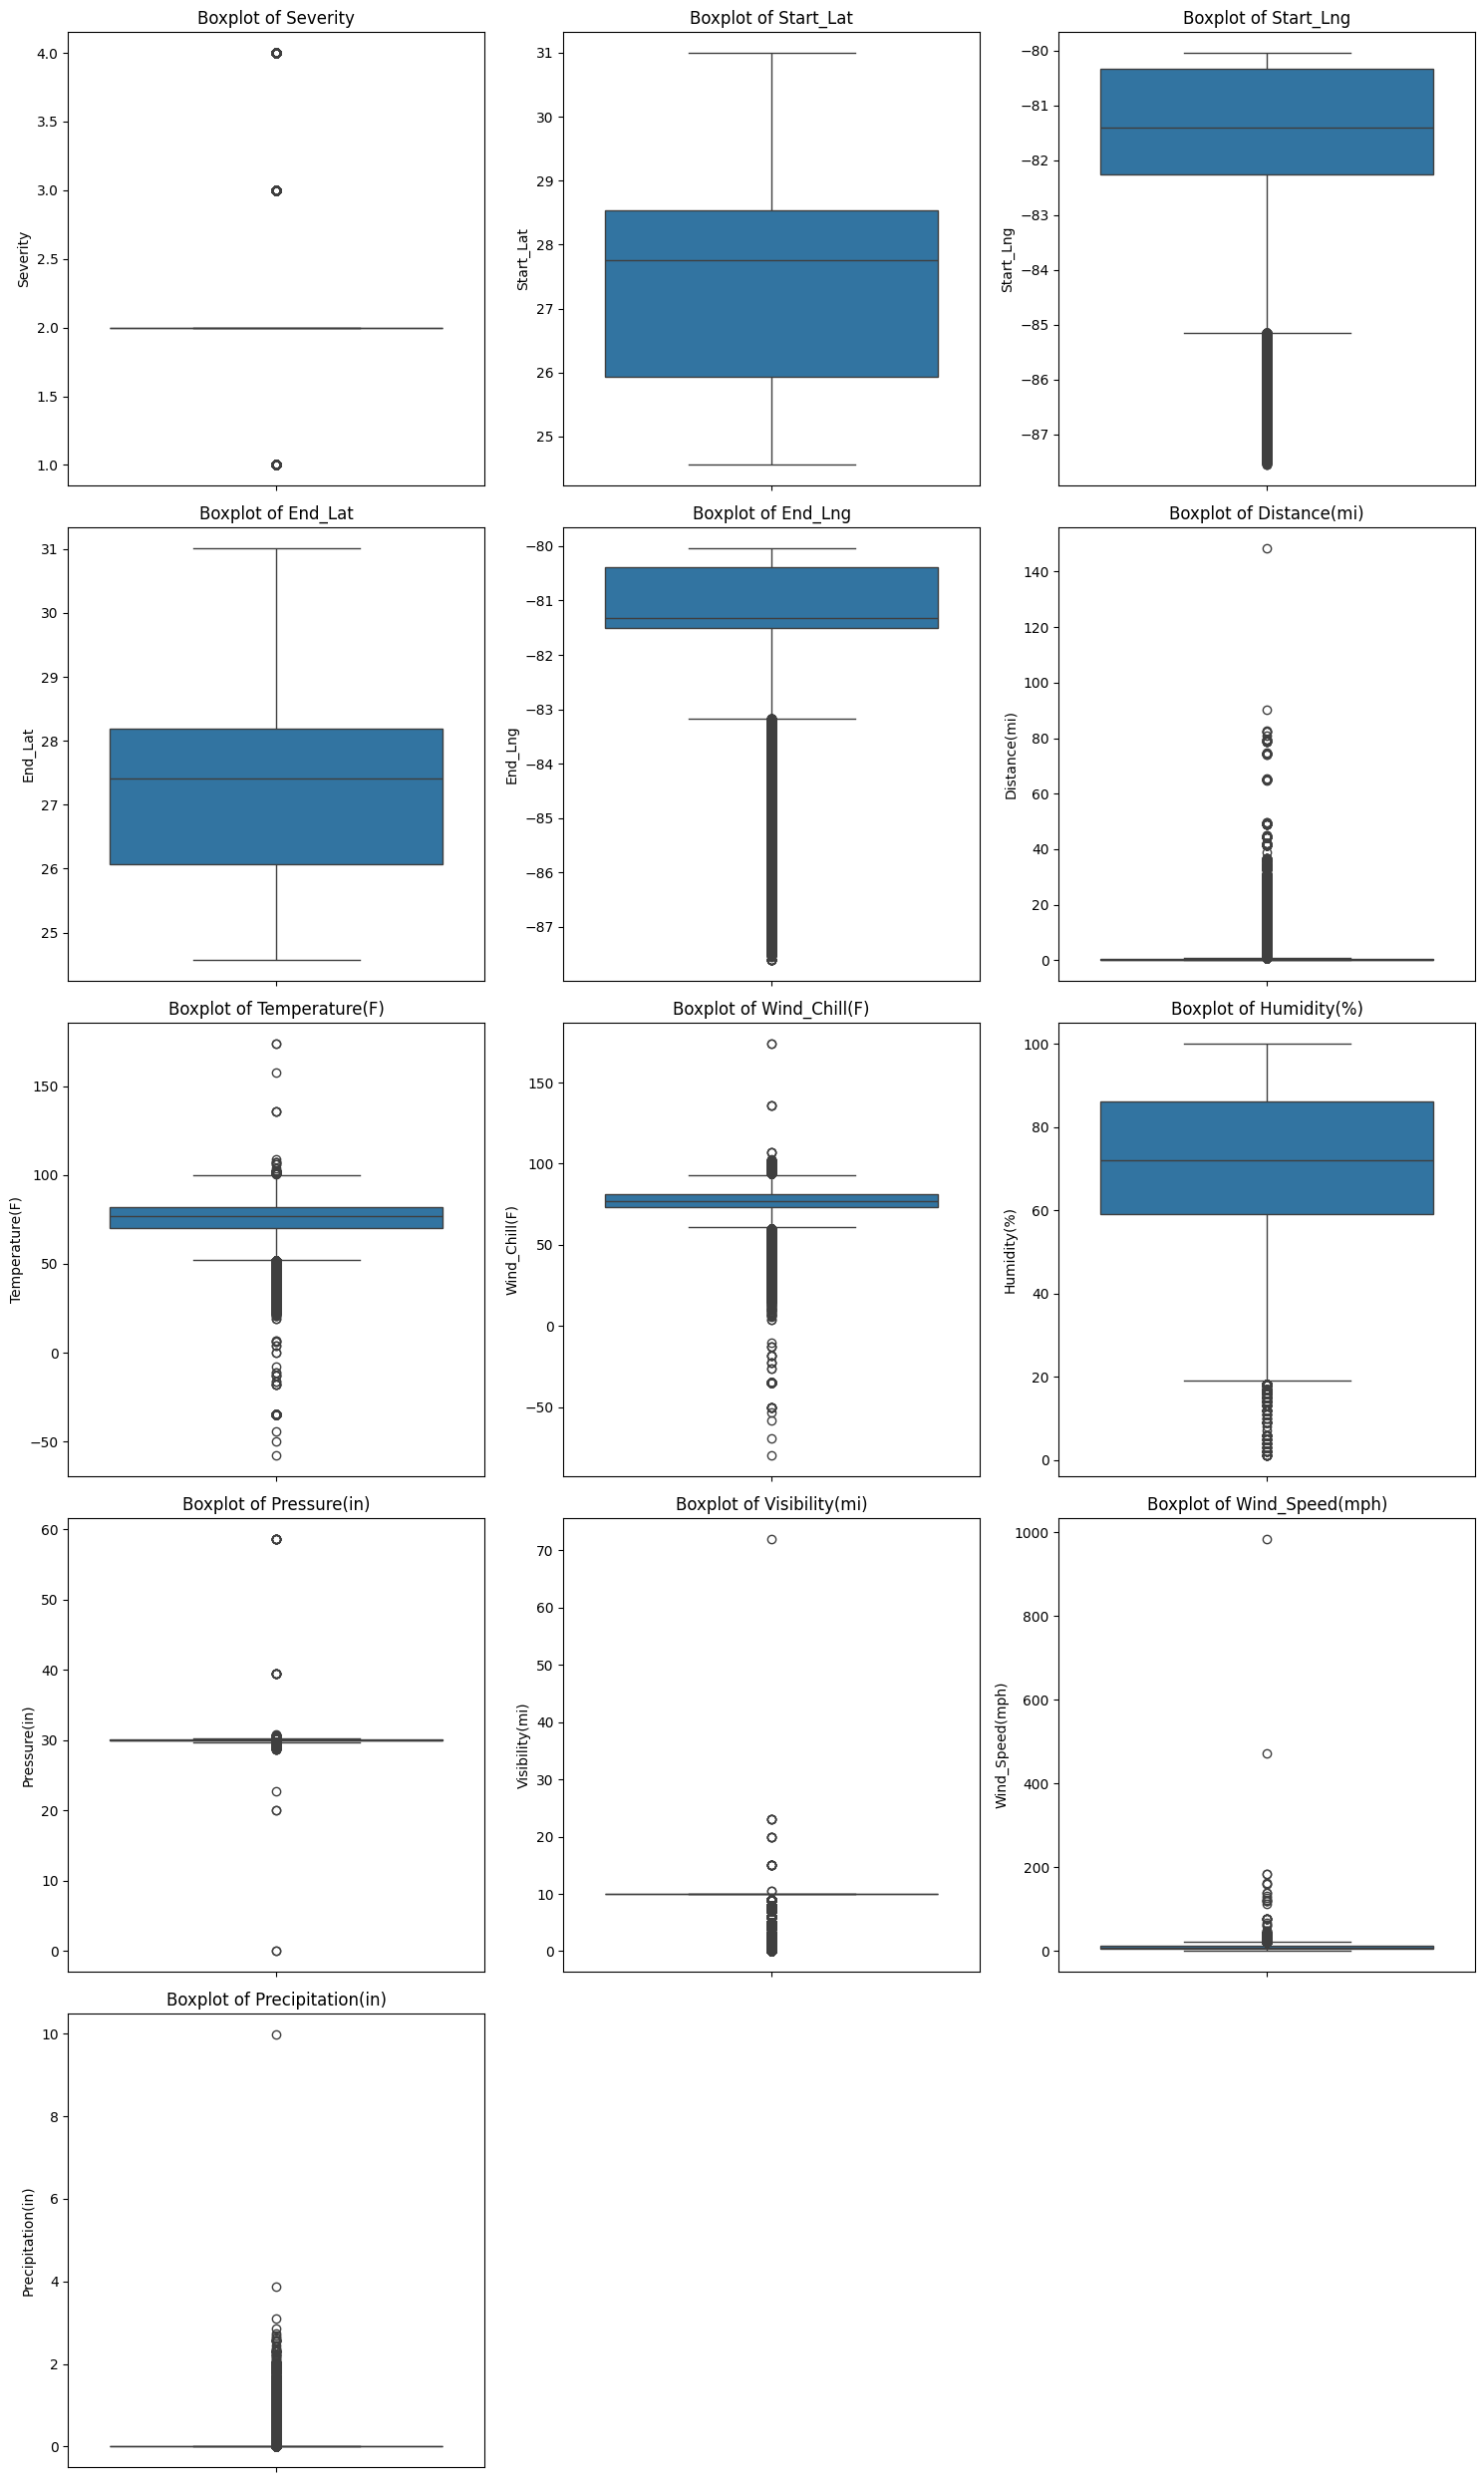

In [19]:
# Create box plots to detect outliers in the original DataFrame
num_features = len(traffic_accidents_raw.select_dtypes(include=['float64', 'int64']).columns)
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))
axes = axes.flatten()

# Plot boxplots for each numerical feature in df
for i, feature in enumerate(traffic_accidents_raw.select_dtypes(include=['float64', 'int64']).columns):
    sns.boxplot(y=traffic_accidents_raw[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel(feature)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

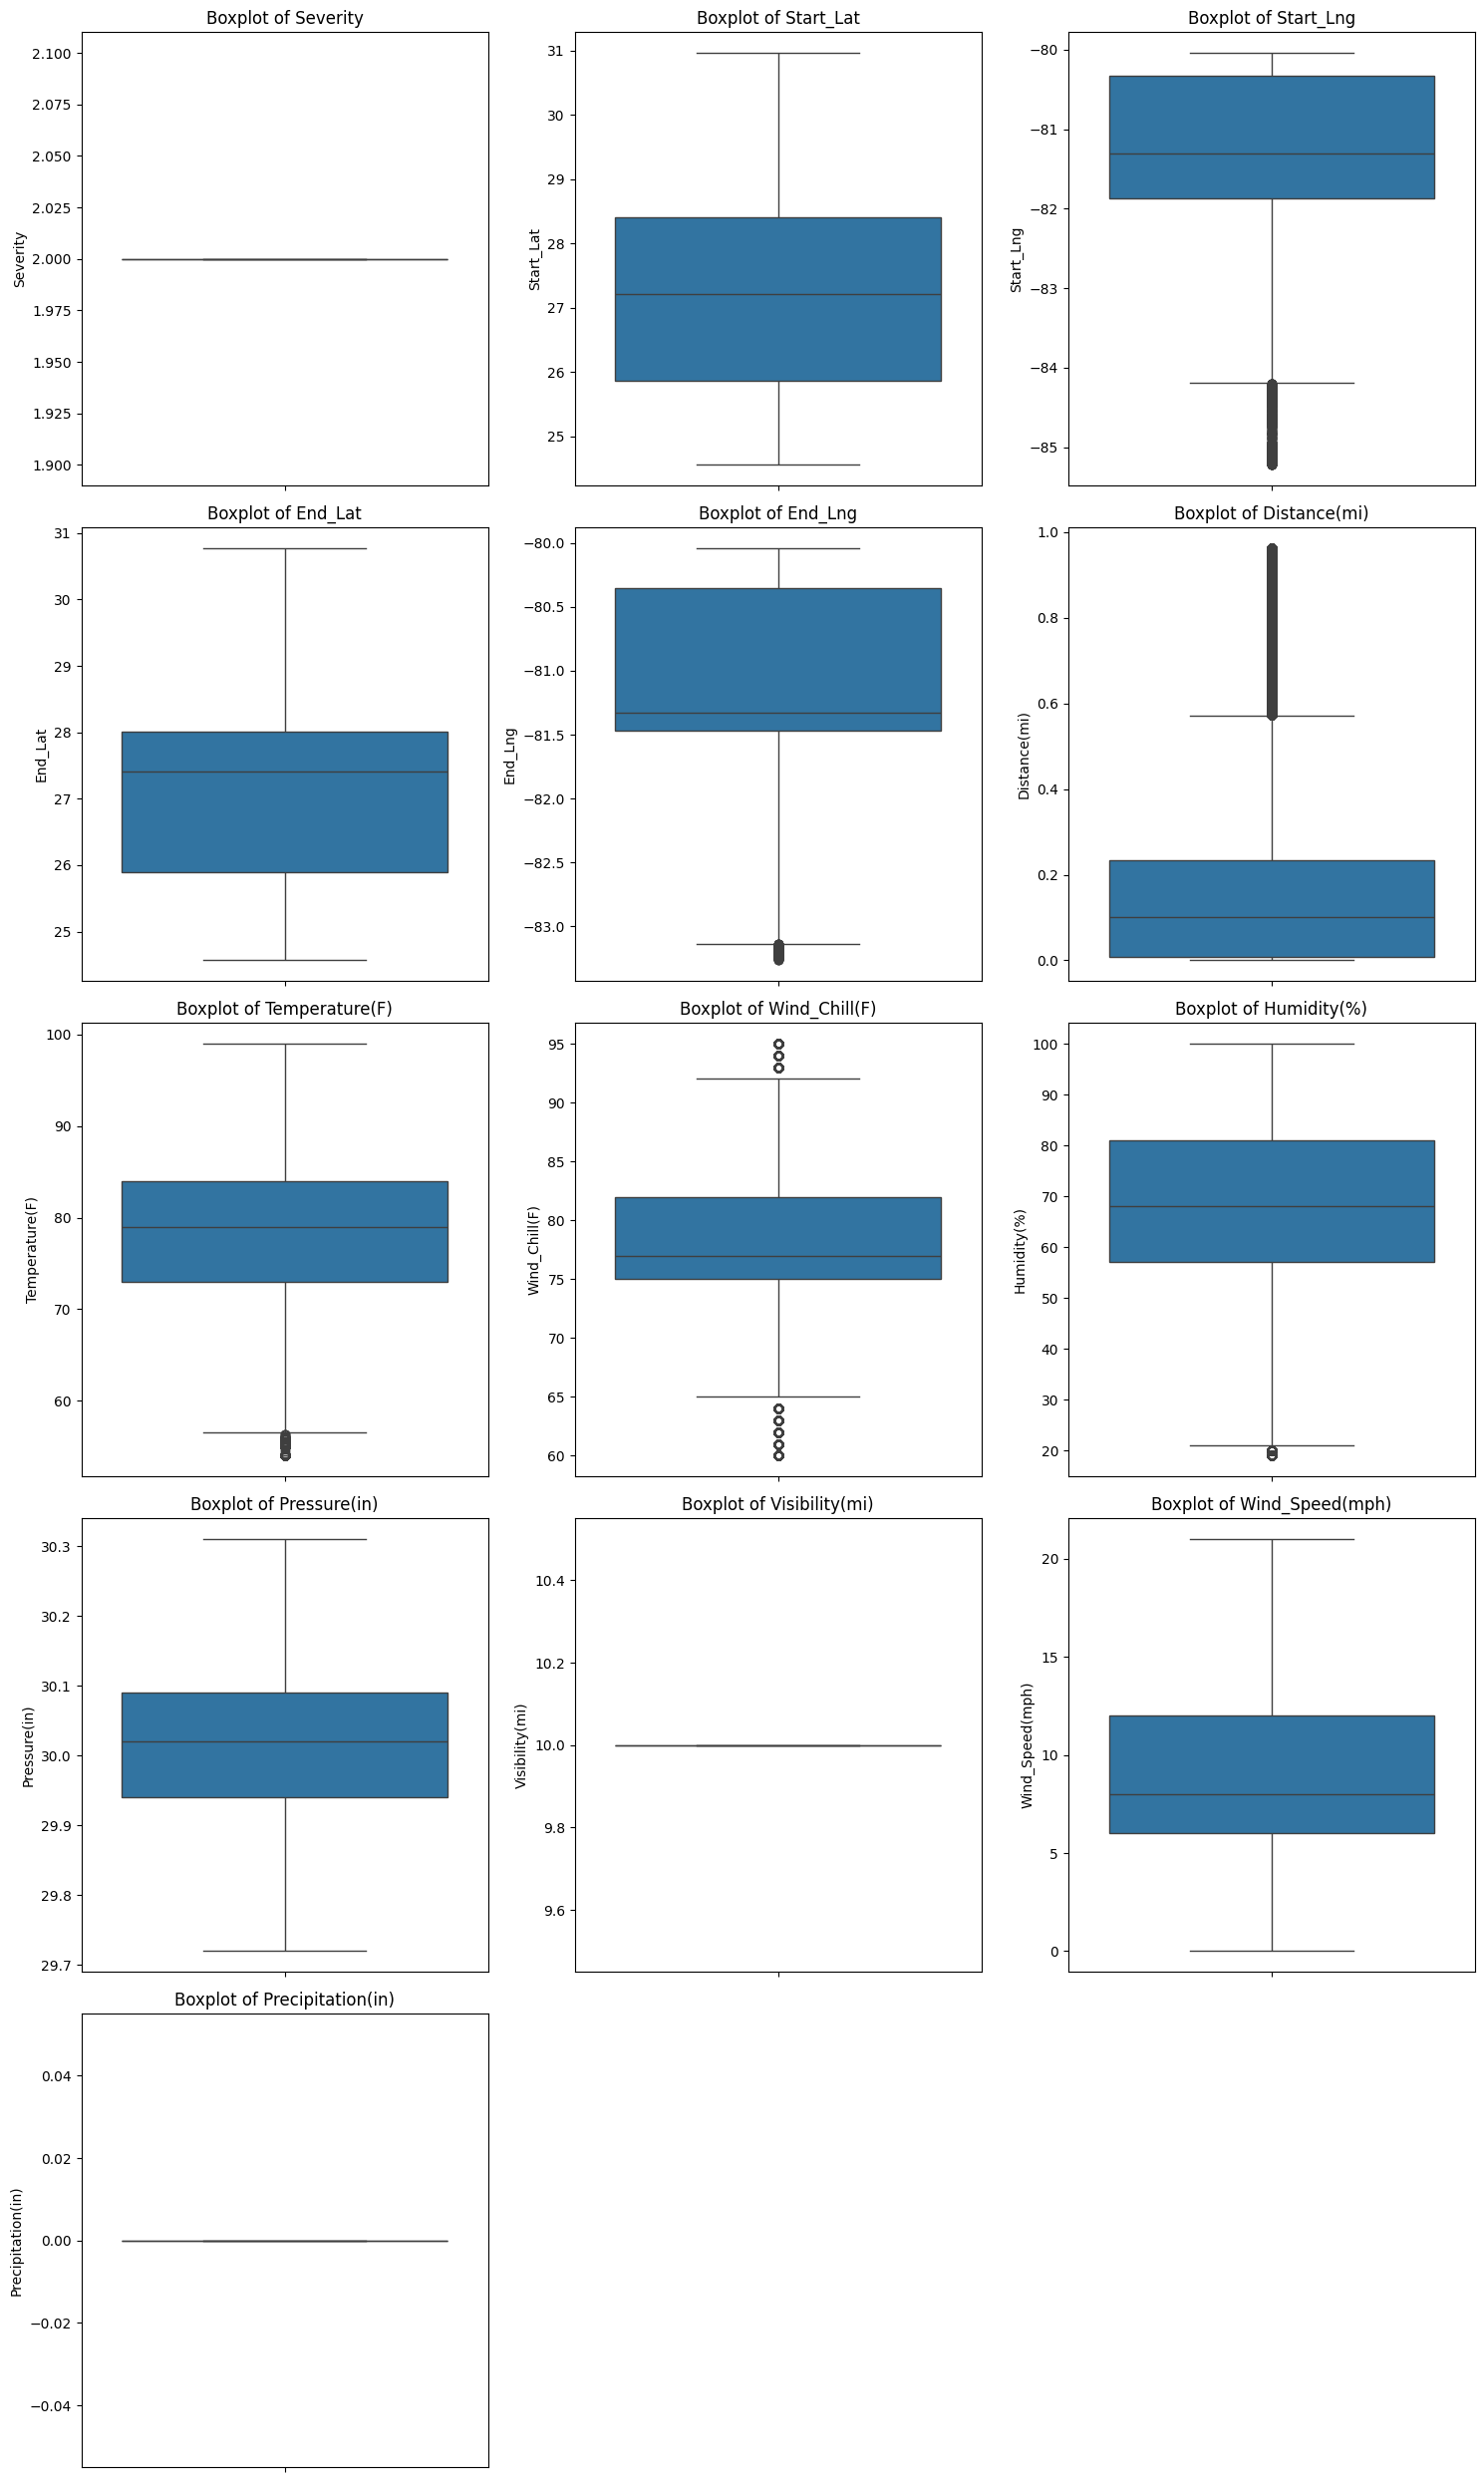

In [20]:
#Initialize a DataFrame to hold the cleaned data
cleaned_df = traffic_accidents_raw.copy()

# Remove outliers using IQR method
for feature in cleaned_df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = cleaned_df[feature].quantile(0.25)
    Q3 = cleaned_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df = cleaned_df[(cleaned_df[feature] >= lower_bound) & (cleaned_df[feature] <= upper_bound)]

# Create box plots for the cleaned data
num_features = len(cleaned_df.select_dtypes(include=['float64', 'int64']).columns)
fig, axes = plt.subplots(nrows=(num_features // 3) + 1, ncols=3, figsize=(15, 5 * ((num_features // 3) + 1)))
axes = axes.flatten()

# Plot boxplots for each numerical feature in cleaned_df
for i, feature in enumerate(cleaned_df.select_dtypes(include=['float64', 'int64']).columns):
    sns.boxplot(y=cleaned_df[feature], ax=axes[i])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_ylabel(feature)

# Hide any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [21]:

dist_cat_columns = traffic_accidents_raw[[
                                            #'ID',
                                            #'Source',
                                            #'Start_Time',
                                            #'End_Time',
                                            #'Description',
                                            'Street',
                                            'City',
                                            'County',
                                            #'State',
                                            #'Zipcode',
                                            #'Country',
                                            #'Timezone',
                                            #'Airport_Code',
                                            #'Weather_Timestamp',
                                            'Wind_Direction',
                                            'Weather_Condition',
                                            'Sunrise_Sunset',
                                            'Civil_Twilight',
                                            'Nautical_Twilight',
                                            'Astronomical_Twilight']
                                          ] # removemos columnas que no agregan valor al analisis por distribución ya que son valores numéricos.

all_frecuencias = {}

for column in dist_cat_columns:

  # Extraemos solo el top 10 
  top_10_freq = traffic_accidents_raw[column].str.strip().value_counts()[:10]

  # Crear un DataFrame con la frecuencia y los valores:
  tmp_frecuencias = pd.DataFrame({
      'Columna': column,
      'Valor': top_10_freq.index,
      'Frecuencia': top_10_freq.values
  })
  all_frecuencias[column] = tmp_frecuencias

#convertimos el diccionario en un dataframe
frecuencias_df = pd.concat(all_frecuencias.values(), ignore_index=True)





In [22]:

# Visualización de las frecuencias de los valores de las columnas categóricas
# Iteramos sobre el top ten
for columna in frecuencias_df['Columna'].unique():

    # Filtrar el DataFrame para la columna actual
    df_columna = frecuencias_df[frecuencias_df['Columna'] == columna]

    # Crear el gráfico de barras
    fig = px.bar(
      y=df_columna['Frecuencia'],
      x=df_columna['Valor'],
      color=df_columna['Valor'],
      color_discrete_sequence=px.colors.sequential.PuBuGn,
      text=df_columna['Frecuencia'],
      template='seaborn'    # templates disponibles: ['ggplot2', 'seaborn', 'simple_white', 'plotly', 'plotly_white', 'plotly_dark', 'presentation', 'xgridoff','ygridoff', 'gridon', 'none']
      #link: https://plotly.com/python/templates/
    )

    #
    fig.update_layout(
        #title_text=f'Distribución de Frecuencias para la columna: "{columna}" en los últimos {count_of_years} años',
        title_text=f'Distribución de Frecuencias para la columna: "{columna}" en los últimos años',
        height=700,
        width=1800,
        xaxis_title=columna,
        yaxis_title="Frecuencia",
        font=dict(size=17, family="Franklin Gothic")
    )


    fig.show()
    print("\n")

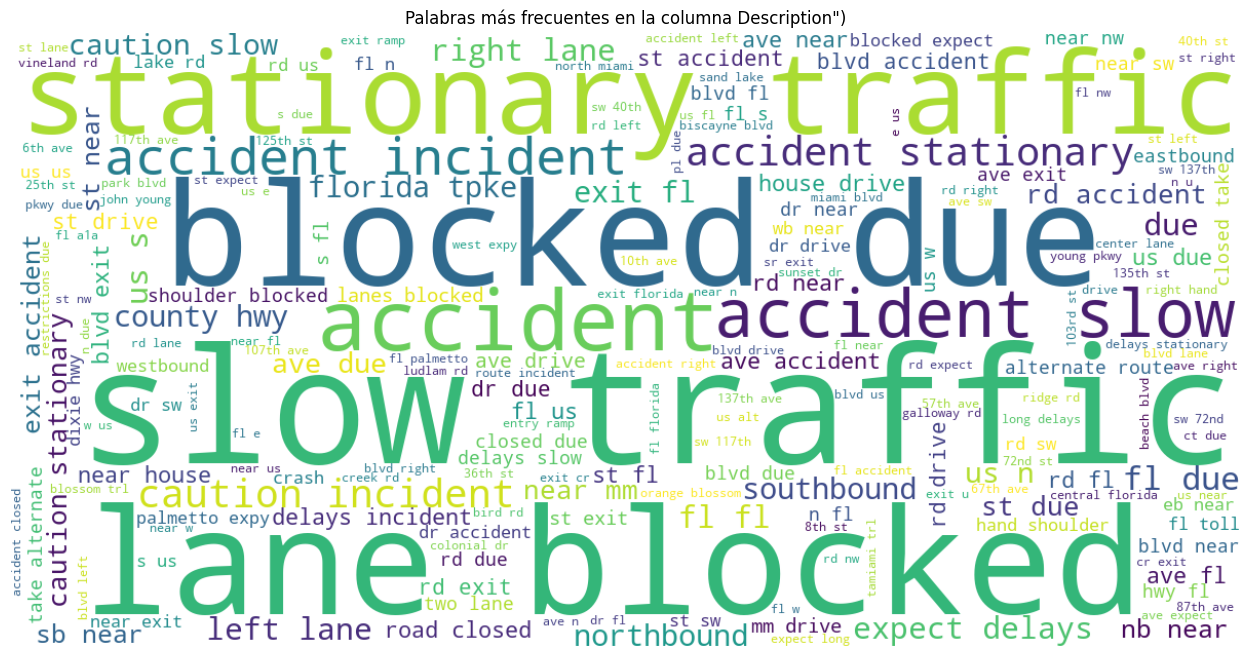

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Excluir "informacion general" de la nube de palabras
text = ' '.join(traffic_accidents_raw['Description'].dropna().str.strip().str.lower().astype(str))

# Crear el WordCloud
wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='viridis').generate(text)

# Mostrar el WordCloud
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras más frecuentes en la columna Description")')
plt.show()

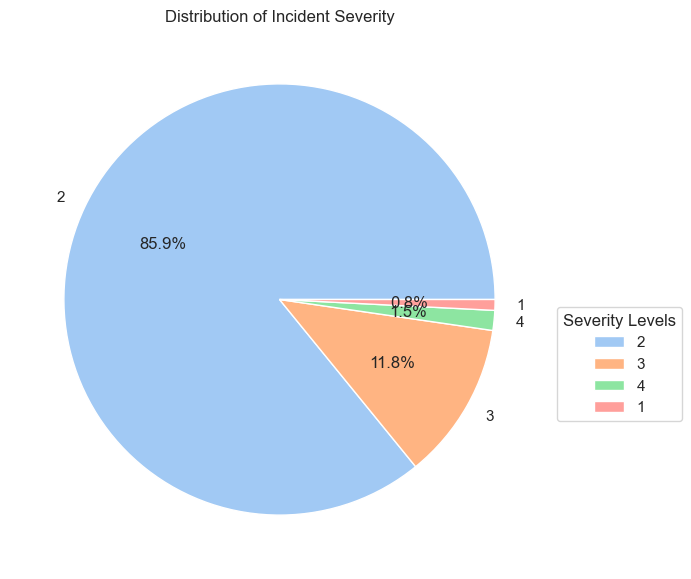

In [24]:
# Count the occurrences of each severity level
severity_count = traffic_accidents_raw['Severity'].value_counts()

# Create the pie chart
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 7))
pastel_colors = sns.color_palette("pastel", len(severity_count))

plt.pie(
    severity_count,
    labels=severity_count.index,
    autopct='%1.1f%%',
    colors=pastel_colors
)
plt.legend(title='Severity Levels', loc='best', bbox_to_anchor=(1, 0.5))
plt.title('Distribution of Incident Severity')
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler

# Definir columnas numéricas EXCLUYENDO 'Severity'
scaled_number_columns = [
    'Distance(mi)',
    'Temperature(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)',
    'Wind_Speed(mph)'
    # Agrega todas tus columnas numéricas excepto 'Severity'
]

# Escalamos las columnas numéricas para normalizar los datos
# Esto es útil para algoritmos de machine learning que son sensibles a la escala de los datos
scaler = StandardScaler()
traffic_accidents_scaled = traffic_accidents_raw.copy()
traffic_accidents_scaled[scaled_number_columns] = scaler.fit_transform(traffic_accidents_scaled[scaled_number_columns])

# Verificar que 'Severity' no fue escalada
print("\nValores originales de Severity (no escalados):")
print(traffic_accidents_scaled['Severity'].head(3))

print("\nValores escalados (ejemplo de columna numérica):")
print(traffic_accidents_scaled['Temperature(F)'].head(3))


Valores originales de Severity (no escalados):
0    3
1    3
2    2
Name: Severity, dtype: int64

Valores escalados (ejemplo de columna numérica):
0   0.50
1   0.50
2   0.45
Name: Temperature(F), dtype: float64


In [26]:
# Estadisticas descriptivas de las columnas numéricas escaladas
traffic_accidents_scaled.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00,880192.00
mean,2.14,27.53,-81.48,27.41,-81.38,-0.00,0.00,75.63,-0.00,0.00,0.00,0.00,0.01
std,0.41,1.56,1.44,1.29,1.20,1.00,1.00,9.62,1.00,1.00,1.00,1.00,0.06
min,1.00,24.55,-87.56,24.57,-87.62,-0.32,-12.85,-80.00,-4.11,-183.90,-5.66,-1.68,0.00
25%,2.00,25.93,-82.25,26.07,-81.50,-0.32,-0.52,73.00,-0.72,-0.47,0.29,-0.69,0.00
50%,2.00,27.76,-81.40,27.41,-81.33,-0.26,0.15,77.00,0.04,0.02,0.29,-0.09,0.00
75%,2.00,28.53,-80.32,28.19,-80.38,-0.09,0.64,81.00,0.85,0.45,0.29,0.70,0.00
max,4.00,31.00,-80.04,31.01,-80.04,88.28,9.50,174.00,1.67,175.31,37.17,193.69,9.98


In [27]:
# Crear la columna 'Severity_Level' 
traffic_accidents_scaled['Severity_Level'] = pd.cut(
    traffic_accidents_scaled['Severity'],
    bins=[0, 1, 2, 4],
    labels=['Low', 'Moderate', 'High']
)
print("\nDistribución de Severity_Level:")
print(traffic_accidents_scaled['Severity_Level'].value_counts())


Distribución de Severity_Level:
Severity_Level
Moderate    755895
High        117214
Low           7083
Name: count, dtype: int64


In [28]:
traffic_accidents_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 880192 entries, 0 to 880191
Data columns (total 47 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   ID                     880192 non-null  object  
 1   Source                 880192 non-null  object  
 2   Severity               880192 non-null  int64   
 3   Start_Time             880192 non-null  object  
 4   End_Time               880192 non-null  object  
 5   Start_Lat              880192 non-null  float64 
 6   Start_Lng              880192 non-null  float64 
 7   End_Lat                880192 non-null  float64 
 8   End_Lng                880192 non-null  float64 
 9   Distance(mi)           880192 non-null  float64 
 10  Description            880192 non-null  object  
 11  Street                 880192 non-null  object  
 12  City                   880192 non-null  object  
 13  County                 880192 non-null  object  
 14  State               

In [29]:
scaled_categorical_columns = traffic_accidents_scaled.select_dtypes(include = ["object","bool"]).columns.to_list()
scaled_categorical_columns


['ID',
 'Source',
 'Start_Time',
 'End_Time',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Wind_Direction',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [30]:
from sklearn.preprocessing import LabelEncoder

# Crear una copia del DataFrame para evitar modificar el original
df_label_encoded = traffic_accidents_scaled.copy()

# Aplicamos Label Encoding solo a las columnas categóricas filtradas
le = LabelEncoder()
for col in scaled_categorical_columns:
    df_label_encoded[col] = le.fit_transform(df_label_encoded[col].astype(str))

print("Dataset después de aplicar Label Encoding:")
df_label_encoded.head(3)

Dataset después de aplicar Label Encoding:


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Severity_Level
0,15142,1,3,28437,28437,27.98,-82.33,27.41,-81.33,-0.31,305393,31544,525,29,0,57477,0,1,79,8574,0.50,77.00,-0.08,-0.47,0.29,15,-0.53,0.00,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,High
1,15153,1,3,28440,28439,27.98,-82.33,27.41,-81.33,-0.31,304709,31544,525,29,0,57477,0,1,79,8576,0.50,77.00,-0.37,-0.47,0.29,22,-0.31,0.00,34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,High
2,15164,1,2,28444,28438,25.63,-80.37,27.41,-81.33,-0.31,40950,43865,329,44,0,42861,0,1,74,8579,0.45,77.00,-0.02,-0.34,0.29,13,0.15,0.00,34,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,Moderate


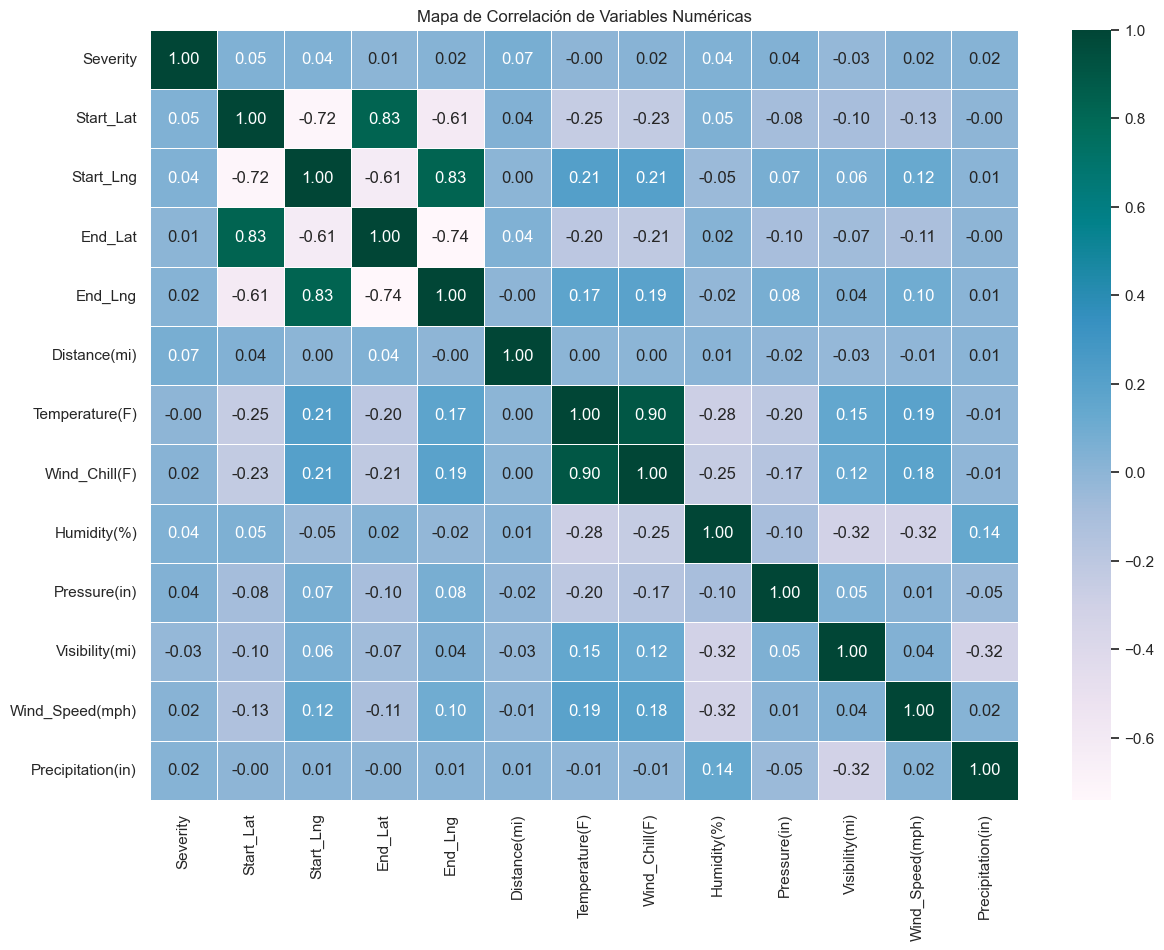

In [31]:
# Mapa de correlación para las variables numéricas
corr_matrix = df_label_encoded[number_columns].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='PuBuGn', fmt='.2f', linewidths=0.5)
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()

### 🛠️ RandomForestClassifier

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [33]:
traffic_accidents_raw.describe(include='all')

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,880192,880192,880192.00,880192,880192,880192.00,880192.00,880192.00,880192.00,880192.00,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192.00,880192.00,880192.00,880192.00,880192.00,880192,880192.00,880192.00,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192,880192
unique,880192,3,NaN,662141,759762,NaN,NaN,NaN,NaN,NaN,383068,49146,586,73,1,88638,1,2,90,174907,NaN,NaN,NaN,NaN,NaN,24,NaN,NaN,62,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
top,A-116062,Source1,NaN,2021-01-26 16:16:13,2020-12-22 03:52:52,NaN,NaN,NaN,NaN,NaN,Accident,I-95 S,Miami,Miami-Dade,FL,33186,US,US/Eastern,KORL,2021-01-26 15:53:00,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,Fair,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day
freq,1,597552,NaN,225,21,NaN,NaN,NaN,NaN,NaN,1155,36920,186801,251601,880192,9140,880192,846262,83487,5968,NaN,NaN,NaN,NaN,NaN,98274,NaN,NaN,326149,872213,879885,689368,878809,841380,877220,876043,880122,823482,864788,878891,723052,880192,642263,679288,715813,745131
mean,NaN,NaN,2.14,NaN,NaN,27.53,-81.48,27.41,-81.38,0.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.40,75.63,71.37,30.02,9.52,NaN,8.46,0.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.41,NaN,NaN,1.56,1.44,1.29,1.20,1.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.38,9.62,17.12,0.16,1.68,NaN,5.04,0.06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.00,NaN,NaN,24.55,-87.56,24.57,-87.62,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-58.00,-80.00,1.00,0.00,0.00,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2.00,NaN,NaN,25.93,-82.25,26.07,-81.50,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.00,73.00,59.00,29.94,10.00,NaN,5.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.00,NaN,NaN,27.76,-81.40,27.41,-81.33,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.00,77.00,72.00,30.02,10.00,NaN,8.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2.00,NaN,NaN,28.53,-80.32,28.19,-80.38,0.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.00,81.00,86.00,30.09,10.00,NaN,12.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_label_encoded["Severity"].value_counts() 

Severity
2    755895
3    104065
4     13149
1      7083
Name: count, dtype: int64

In [42]:
min_class_count = df_label_encoded["Severity"].value_counts().min()

# Undersampling sin warning de pandas
df_final = (
    df_label_encoded
    .groupby('Severity', group_keys=False)
    .apply(lambda x: x.sample(n=min_class_count, random_state=42))
    .reset_index(drop=True)
    .sample(frac=1, random_state=42)
    .reset_index(drop=True)
)

df_final['Severity'].value_counts()

C:\Users\edegr\AppData\Local\Temp\ipykernel_5044\350265395.py:7: FutureWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Severity
3    7083
2    7083
1    7083
4    7083
Name: count, dtype: int64

In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Cargar datos
df = df_label_encoded

if 'Hour' not in df.columns and 'Start_Time' in traffic_accidents_scaled.columns:
    df['Hour'] = pd.to_datetime(traffic_accidents_scaled['Start_Time'], errors='coerce').dt.hour


# 2. Seleccionar columnas relevantes
cols = ["Severity",
        "Start_Lat", "Start_Lng","Street","City","County",
        "Amenity", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal","Turning_Loop",
        "Wind_Chill(F)", "Temperature(F)", "Humidity(%)", "Visibility(mi)", "Wind_Speed(mph)", "Weather_Condition","Precipitation(in)",
        "Hour"
        ]
df = df[cols].dropna()


# 5. Codificar Weather_Condition
df = pd.get_dummies(df, columns=["Weather_Condition"], drop_first=True)

# 6. Variable objetivo
df["Target"] = (df["Severity"] >= 2).astype(int)
df = df.drop(columns=["Severity"])

# 7. X y y
X = df.drop("Target", axis=1)
y = df["Target"]

# 8. Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training Set Size: {len(X_train)}")
print(f"Test Set Size: {len(X_test)}") 



Training Set Size: 535937
Test Set Size: 229688


In [55]:
# 9. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC:", roc_auc_score(y_test, y_prob))
print("\nAccuracy:",accuracy_score(y_val, lgb_predictions))

Confusion Matrix:
 [[   194   1931]
 [    69 227494]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.09      0.16      2125
           1       0.99      1.00      1.00    227563

    accuracy                           0.99    229688
   macro avg       0.86      0.55      0.58    229688
weighted avg       0.99      0.99      0.99    229688


ROC AUC: 0.901306992168426

Accuracy: 0.9909504232465279


### 🛠️ LightGBM (Light Gradient Boosting Machine)

In [54]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report

# Split inicial (como ya lo tienes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Entrena LightGBM 
lgb_classifier = lgb.LGBMClassifier(random_state=42)
lgb_classifier.fit(X_train, y_train)

# Predice en TEST, igual que RandomForest
y_pred = lgb_classifier.predict(X_test)
y_prob = lgb_classifier.predict_proba(X_test)[:, 1]

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nROC AUC:", roc_auc_score(y_test, y_prob))
print("\nAccuracy:",accuracy_score(y_val, lgb_predictions))


[LightGBM] [Info] Number of positive: 530979, number of negative: 4958
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1831
[LightGBM] [Info] Number of data points in the train set: 535937, number of used features: 62
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.990749 -> initscore=4.673720
[LightGBM] [Info] Start training from score 4.673720
Confusion Matrix:
 [[    78   2047]
 [   133 227430]]

Classification Report:
               precision    recall  f1-score   support

           0       0.37      0.04      0.07      2125
           1       0.99      1.00      1.00    227563

    accuracy                           0.99    229688
   macro avg       0.68      0.52      0.53    229688
weighted avg       0.99      0.99      0.99    229688


ROC AUC: 0.9269452487753229

Accurac

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# 1. Entrenar SVM lineal
sgd_classifier = SGDClassifier(random_state=42, loss='hinge')  # hinge = SVM, log = logistic regression
sgd_classifier.fit(X_train, y_train)

# 2. Predecir sobre X_test (igual que RF y LGBM)
sgd_predictions = sgd_classifier.predict(X_test)

# 3. Para ROC AUC, necesitas probabilidades → usa decision_function para SVM
sgd_scores = sgd_classifier.decision_function(X_test)

# 4. Métricas iguales
print("Confusion Matrix:\n", confusion_matrix(y_test, sgd_predictions))
print("\nClassification Report:\n", classification_report(y_test, sgd_predictions))
print("\nROC AUC:", roc_auc_score(y_test, sgd_scores))
print("\nAccuracy:", accuracy_score(y_test, sgd_predictions))
